In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
from scipy import optimize as opt
os.chdir(r'C:/STUDY/content/Andrew Ng/machine-learning-ex3/ex3')

In [19]:
data = loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

* the dataset has 5000 training examples where each example is a 20-by-20 pixel grey scale image unrolled into a 400-dimensional vector thus forming a 5000 by 400 matrix X. Also note that the digit 0 is labeled as 10 while the digits 1–9 are labeled as 1–9 in the labeling vector y. 

In [20]:
X = data['X']
x_for_pred = data['X']
y = data['y']
m = len(y)
ones = np.zeros((m,1))

# visualizing some samples

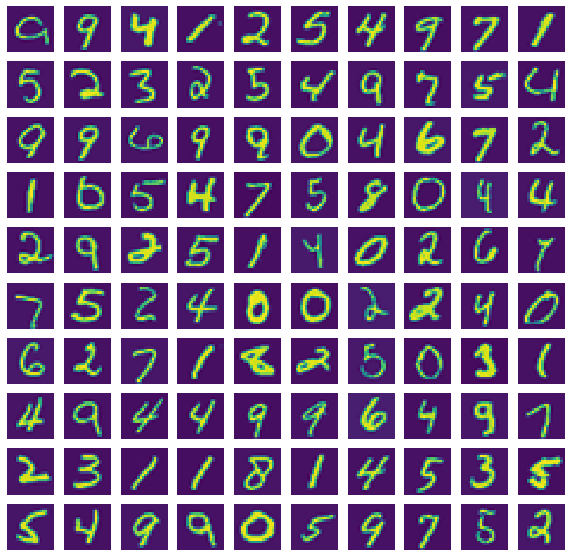

In [21]:
fig , ax = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(X[np.random.randint(X.shape[0])].reshape((20,20),order="F"))
        ax[i][j].axis("off")        

(400,)


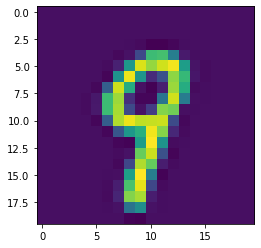

In [22]:
print(X[4532].shape)
plt.imshow(X[4532].reshape((20,20),order="F"))

In [23]:
ones.shape , X.shape , y.shape

((5000, 1), (5000, 400), (5000, 1))

In [24]:
X = np.hstack((ones,X))
(m,n) = X.shape
k = 10
lamda = 0.1
theta = np.zeros((k,n))
X.shape , theta[1].shape

((5000, 401), (401,))

In [25]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def CostFunction(theta,X,y,lamda):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    h = sigmoid(X*theta.T)
    reg = np.multiply( (lamda/(2*m)) , np.sum(np.power(theta[:,1:],2) ))
    J = np.multiply( (-1/m) , ( y.T*np.log(h) + (1-y).T*np.log(1-h) )) + reg
    return float(J)

def Gradient(theta,X,y,lamda):
    theta = np.matrix(theta)  #(1,401)
    X = np.matrix(X)
    y = np.matrix(y)
    h = sigmoid(X*theta.T)
    reg =  np.multiply((lamda/m) , theta.T[1:]) #(400,1)
    grad = np.multiply((1/m) , X.T*(h-y))  #(401,1)
    grad[1:] += reg 
    
    return np.array(grad.T)[0]
    
    

In [26]:
CostFunction(theta[1],X,y,lamda)

160.39425758157128

In [27]:
Gradient(theta,X,y,lamda)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -7.74530186e-08,
        3.19876600e-06,  1.89536237e-05, -7.06376094e-04, -8.97395355e-04,
       -3.72741263e-04, -1.10787541e-04, -1.37049401e-04, -4.11905416e-05,
        3.09307938e-05,  7.56273049e-05,  1.66101324e-04,  1.88959823e-04,
        1.11618541e-04,  3.44740605e-05,  2.31849497e-07, -3.65944989e-07,
        0.00000000e+00, -2.71480120e-07,  2.68348312e-06,  1.35802658e-06,
        5.10971729e-05,  9.29459372e-05, -1.13518367e-03, -4.04630781e-03,
       -5.65616107e-03, -4.38249876e-03, -1.22936584e-03,  1.06402725e-03,
        1.67724463e-03,  1.83122226e-03,  1.41359436e-03,  1.00669534e-03,
        6.22600175e-04,  2.88468971e-04,  1.69300222e-04,  4.53328568e-05,
        1.64277642e-05,  2.32894093e-06, -2.61429416e-05,  6.07579192e-05,
       -2.68789968e-04, -2.19152610e-03, -1.11673884e-02, -2.41869621e-02,
       -3.12963830e-02, -2.35164217e-02, -1.04915336e-02, -4.58342103e-03,
       -2.20552420e-03, -

In [28]:
optimal = np.zeros((k,n))
for i in range(k):
    current_class = i if i else 10
    optimal[i] = opt.fmin_cg(f=CostFunction , fprime=Gradient , x0=optimal[i] ,
                            args=(X,(y==current_class),lamda),maxiter=500)


Optimization terminated successfully.
         Current function value: 0.011876
         Iterations: 110
         Function evaluations: 422
         Gradient evaluations: 422
Optimization terminated successfully.
         Current function value: 0.013718
         Iterations: 118
         Function evaluations: 453
         Gradient evaluations: 453
Optimization terminated successfully.
         Current function value: 0.054751
         Iterations: 244
         Function evaluations: 760
         Gradient evaluations: 760
Optimization terminated successfully.
         Current function value: 0.068106
         Iterations: 233
         Function evaluations: 689
         Gradient evaluations: 689
Optimization terminated successfully.
         Current function value: 0.034004
         Iterations: 164
         Function evaluations: 552
         Gradient evaluations: 552
Optimization terminated successfully.
         Current function value: 0.054523
         Iterations: 254
         Function ev

In [29]:
optimal.shape

(10, 401)

In [30]:
pred = np.argmax(X @ optimal.T, axis = 1)
#print(pred)
pred = [e if e else 10 for e in pred] # make the aargument '10' where it is '0'
#print(pred)
accuracy = np.mean(pred == y.flatten()) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 95.88 %


In [ ]:
def predict(x,theta):
    probabilities = np.zeros(k)
    for i in range(k):
        probabilities[i] = sigmoid(np.dot(X[x],theta[i].T))
    return np.argmax(probabilities)    

PREDICTED VALUE FOR THE IMAGE FROM DATASET: 9


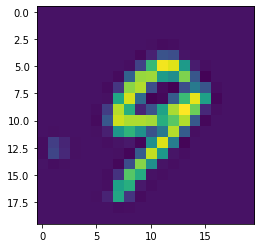

In [40]:
random = np.random.randint(5000)
sample = x_for_pred[random]
plt.imshow(sample.reshape((20,20),order='F'))
print('PREDICTED VALUE FOR THE IMAGE: {}'.format(predict(random,optimal)))